#Load IPL.csv and Analysing File

In [127]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/NEW_PROJECT/IPL.csv')

df.head(5)
#How many columns
df.columns
#Giving information about dataset like dtype,not null value etc.
df.info()
#Represent shape of dataset
print(f"Your Dataset has {df.shape[0]} rows and {df.shape[1]} columns!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-

#See total Null values in dataset.


In [128]:

df.isna().sum()
# df.isna().any()

,0
match_id,0
date,0
venue,0
team1,0
team2,0
stage,0
toss_winner,0
toss_decision,0
first_ings_score,0
first_ings_wkts,0


#Which Team won more times!


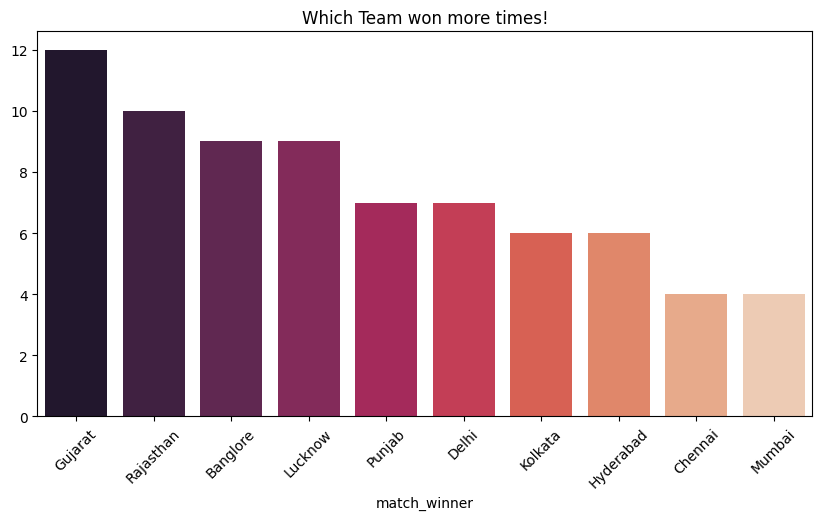

In [129]:
match_wins = df['match_winner'].value_counts()
match_wins
plt.figure(figsize=(10,5))
sns.barplot(x = match_wins.index, y = match_wins.values,palette='rocket')
plt.xticks(rotation=45)
plt.title("Which Team won more times!")
plt.show()

#Which team has played most matches


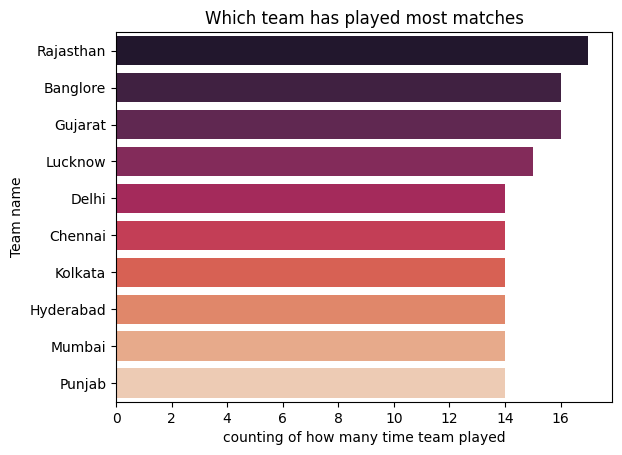

In [130]:

concat_match = pd.concat([df['team1'],df['team2']])
counts = concat_match.value_counts()

sns.barplot(y = counts.index,x = counts.values,palette = 'rocket')
plt.title("Which team has played most matches")
plt.xlabel("counting of how many time team played")
plt.ylabel("Team name")
plt.show()


#Toss Decision Trends


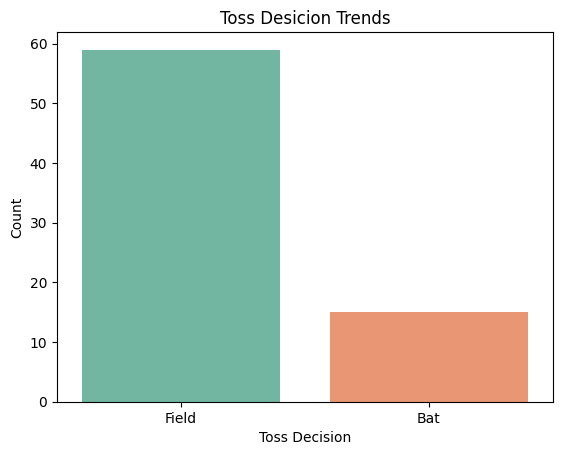

In [132]:
sns.countplot(x='toss_decision',data=df,palette='Set2')
plt.title("Toss Desicion Trends")
plt.xlabel("Toss Decision")
plt.ylabel("Count")
plt.show()

 #Toss Winner Vs Match Winner (Which mean who won toss that had won match? )


In [133]:

total_matches = df['match_id'].nunique()
Winner = df[df['toss_winner'] == df['match_winner']]['match_id'].count()

p = ((Winner/total_matches)*100)
print(f"Toss Winner Vs Match Winner {p:.2f}%")



Toss Winner Vs Match Winner 48.65%


#How do teams win?(Run vs Wickets)


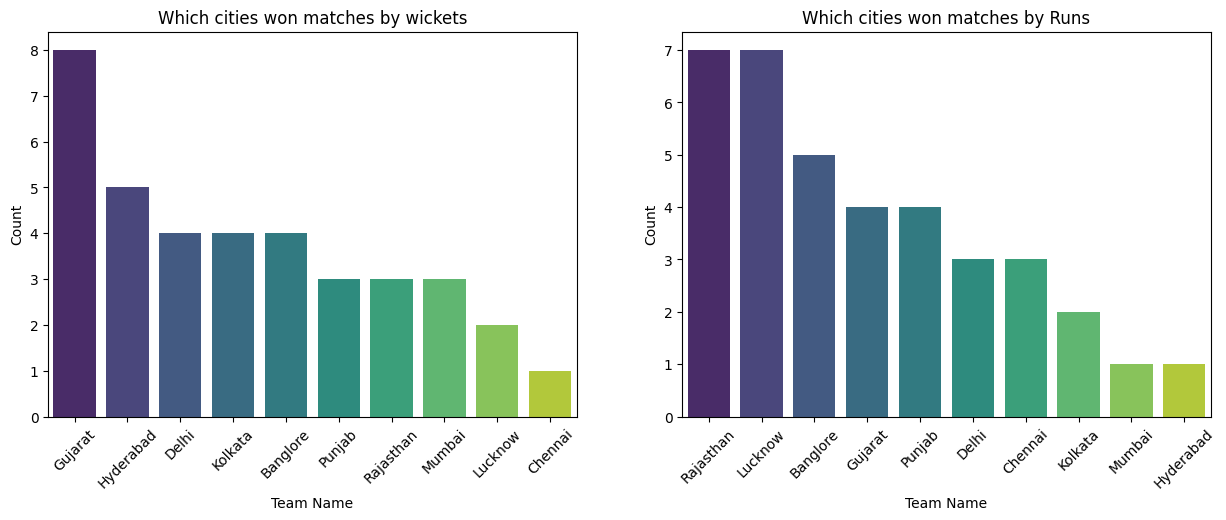

In [134]:

df.head()
Wicket = df[df['won_by'] == "Wickets"]
Run = df[df['won_by'] == "Runs"]
Wicket_counts = Wicket['match_winner'].value_counts()
Run_counts = Run['match_winner'].value_counts()

#Which cities won matches by wickets
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x=Wicket_counts.index,y=Wicket_counts.values,palette='viridis')
plt.xticks(rotation=45)
plt.title("Which cities won matches by wickets")
plt.xlabel("Team Name")
plt.ylabel("Count")

#Which cities won matches by Runs
plt.subplot(1,2,2)
sns.barplot(x=Run_counts.index,y=Run_counts.values,palette='viridis')
plt.xticks(rotation=45)
plt.title("Which cities won matches by Runs")
plt.xlabel("Team Name")
plt.ylabel("Count")
plt.show()


#How Teams Win Matches by countplot with smart approach


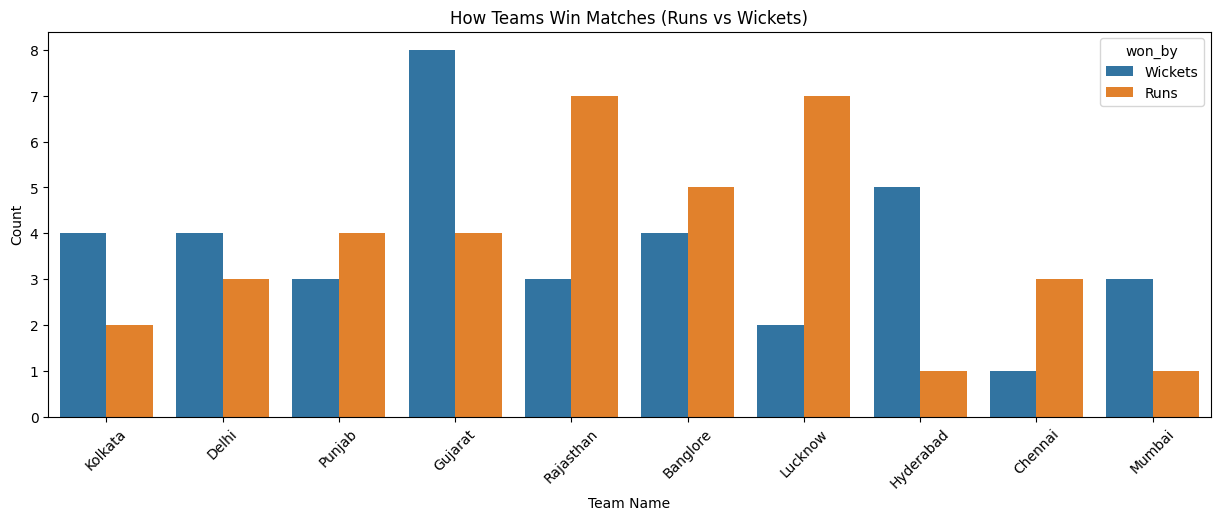

In [135]:

plt.figure(figsize = (15,5))
sns.countplot(
    x='match_winner',
    hue = 'won_by',
    data = df,
    palette = 'tab10'
)
plt.xticks(rotation=45)
plt.title("How Teams Win Matches (Runs vs Wickets)")
plt.xlabel("Team Name")
plt.ylabel("Count")
plt.show()

#Most 'Player of the Match' Awards


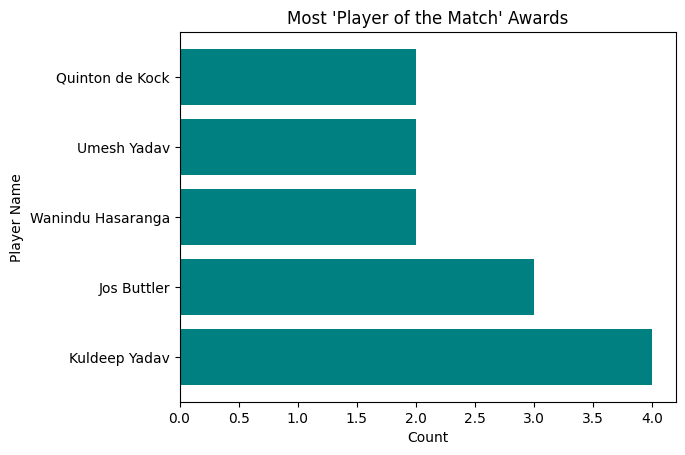

In [136]:

awards = df['player_of_the_match'].value_counts().nlargest(5)
plt.barh(awards.index,awards.values,color='teal')
plt.title("Most 'Player of the Match' Awards")
plt.xlabel('Count')
plt.ylabel('Player Name')
plt.show()



#Two Top Scorers


In [137]:

Scorer = df.groupby('top_scorer')['highscore'].max().nlargest(2)
Scorer

,highscore
top_scorer,
Quinton de Kock,140
Jos Buttler,116


#Best Bowlings


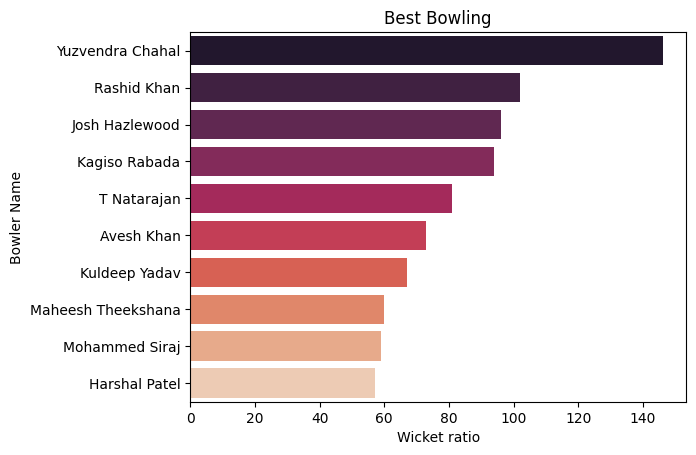

In [138]:
def ExtractWickets(text):
  return text.split('--')[1]

df['highest_wickets'] = df['best_bowling_figure'].apply(ExtractWickets)
df['highest_wickets'] = df['highest_wickets'].astype(int)
# df['highest_wickets']

Best_bowling = df.groupby('best_bowling')['highest_wickets'].sum().nlargest(10)

# Best_bowling

sns.barplot(y=Best_bowling.index,x=Best_bowling.values,palette='rocket')
plt.title("Best Bowling")
plt.ylabel("Bowler Name")
plt.xlabel("Wicket ratio")
plt.show()

#VENUE Analysis


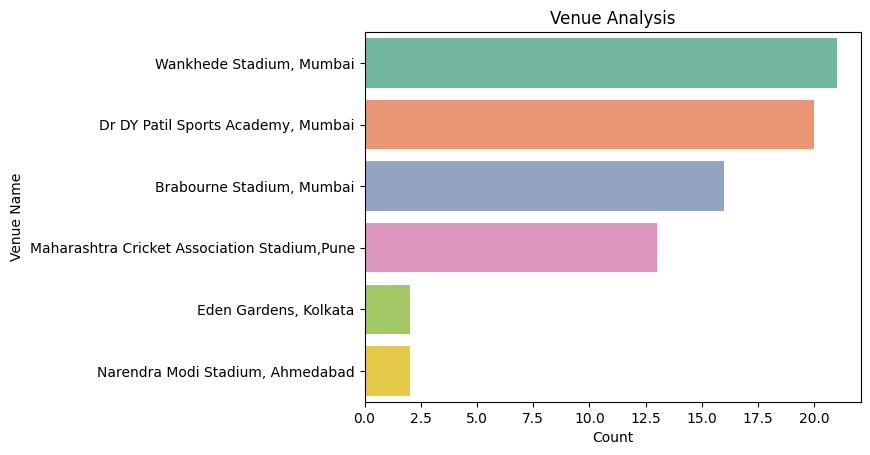

In [139]:
#VENUE Analysis
Venue = df['venue'].value_counts()
# Venue

sns.barplot(y=Venue.index,x=Venue.values,palette='Set2')
plt.title("Venue Analysis")
plt.ylabel("Venue Name")
plt.xlabel("Count")
plt.show()

#Conclusion

This EDA project analyzed IPL match data to understand team performance, toss impact, and player contributions. The analysis showed that while winning the toss provides a slight advantage, match results mainly depend on overall team performance. Teams chasing the target often won more matches, highlighting the importance of second-innings strategy. Player and bowling analysis identified a few consistent performers who had a major impact on match outcomes. Overall, this project demonstrates effective use of data cleaning, aggregation, and visualization techniques to extract meaningful insights from real-world sports data.